In [113]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

from matplotlib import colormaps
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [114]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [115]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [116]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

I use the following runs for plotting:
- val_per2_4 (no beach)
- val_per2_8 (bit of beach)
- val_per2_13 (yes beach)

In [117]:
ds_IC = xr.load_dataset("val_per2_4_0000000000.nc")
ds_0 = xr.load_dataset("val_per2_2_0000035052.nc")
ds_no = xr.load_dataset("val_per2_4_0000035052.nc")
ds_bit = xr.load_dataset("val_per2_8_0000035052.nc")
ds_yes = xr.load_dataset("val_per2_13_0000035052.nc")

print(ds_IC)

<xarray.Dataset> Size: 3MB
Dimensions:                          (xgr: 326, depth_id: 150, xgr_xb: 263)
Coordinates:
  * xgr                              (xgr) float64 3kB -6.59 0.5 ... 1.47e+03
  * depth_id                         (depth_id) int64 1kB 0 1 2 ... 147 148 149
  * xgr_xb                           (xgr_xb) float64 2kB -6.59 ... 1.344e+03
Data variables: (12/37)
    timestep_id                      int64 8B 0
    timestamp                        datetime64[ns] 8B 2012-01-01
    cumulative_computational_time    float64 8B 9.502
    zgr                              (xgr) float64 3kB -10.0 -10.0 ... 13.25
    angles                           (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    wave_height                      (xgr_xb) float64 2kB 0.0 0.0 ... 0.0 0.0
    ...                               ...
    latent_heat_flux                 (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    convective_heat_flux             (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    total_heat_flux   

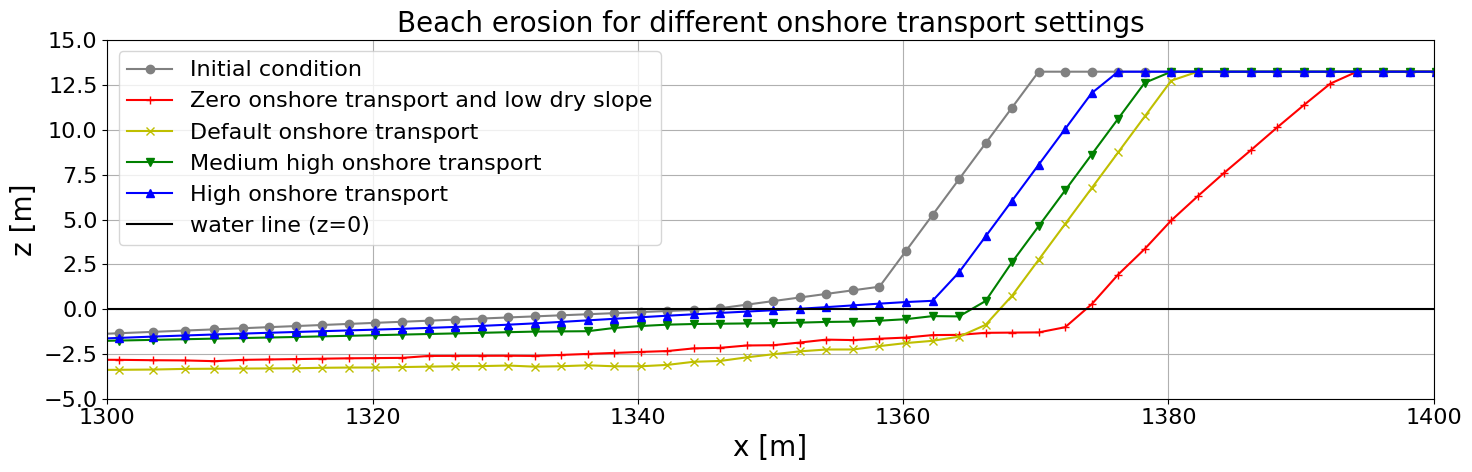

In [118]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
# ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

ax.plot(ds_0['xgr'], ds_0['zgr'], label='Zero onshore transport and low dry slope', color='r', marker='+')
# ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

ax.plot(ds_no['xgr'], ds_no['zgr'], label='Default onshore transport', color='y', marker='x')
# ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

ax.plot(ds_bit['xgr'], ds_bit['zgr'], label='Medium high onshore transport', color='g', marker='v')
# ax.scatter(ds_bit['xgr'], ds_bit['zgr'], color='b')

ax.plot(ds_yes['xgr'], ds_yes['zgr'], label='High onshore transport', color='b', marker='^')
# ax.scatter(ds_yes['xgr'], ds_yes['zgr'], color='g')


ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Beach erosion for different onshore transport settings')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'beach_erosion.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

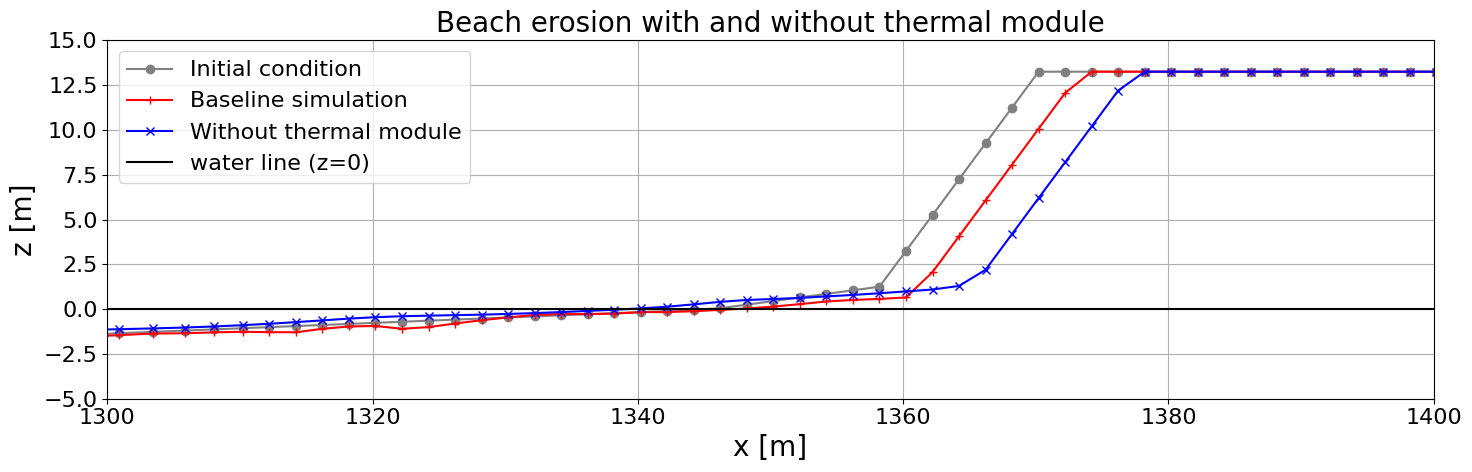

In [119]:
ds_IC = xr.load_dataset("sa_base_0000000000.nc")
ds_base = xr.load_dataset("sa_base_0000017508.nc")
ds_no_therm = xr.load_dataset("sa_lvl3_1_0000017508.nc")

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
# ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

ax.plot(ds_base['xgr'], ds_base['zgr'], label='Baseline simulation', color='r', marker='+')
# ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

ax.plot(ds_no_therm['xgr'], ds_no_therm['zgr'], label='Without thermal module', color='b', marker='x')
# ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Beach erosion with and without thermal module')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'transect_without_thermal_module.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

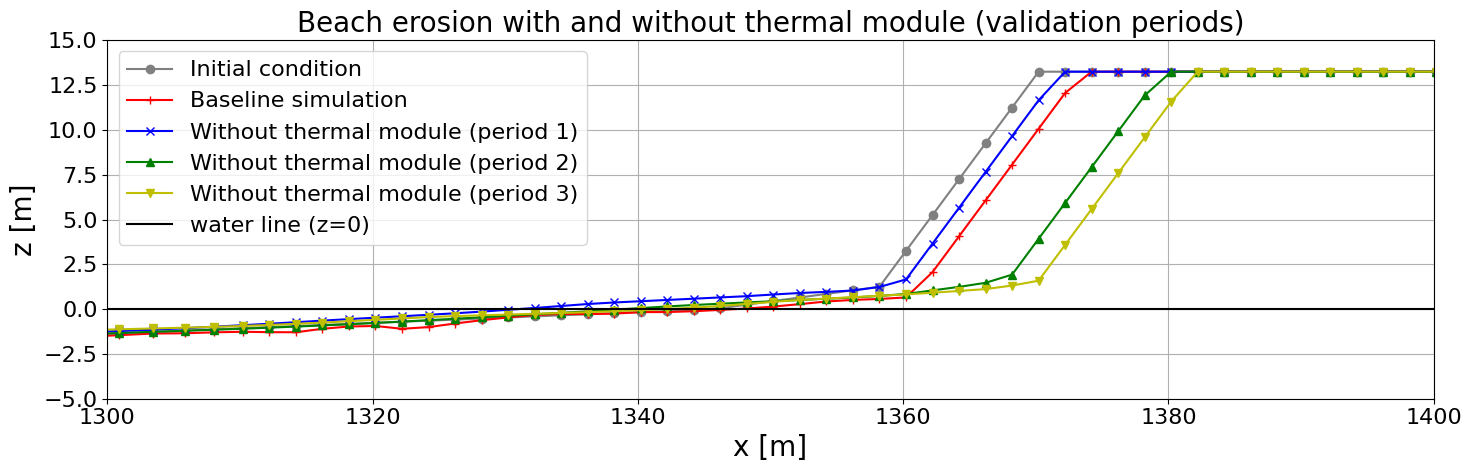

In [120]:
ds_IC = xr.load_dataset("sa_base_0000000000.nc")
ds_base = xr.load_dataset("sa_base_0000017508.nc")
ds_no_therm1 = xr.load_dataset("val_per1_no-therm_end.nc")
ds_no_therm2 = xr.load_dataset("val_per2_no-therm_end.nc")
ds_no_therm3 = xr.load_dataset("val_per3_no-therm_end.nc")

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
# ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

ax.plot(ds_base['xgr'], ds_base['zgr'], label='Baseline simulation', color='r', marker='+')
# ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

ax.plot(ds_no_therm1['xgr'], ds_no_therm1['zgr'], label='Without thermal module (period 1)', color='b', marker='x')
ax.plot(ds_no_therm2['xgr'], ds_no_therm2['zgr'], label='Without thermal module (period 2)', color='g', marker='^')
ax.plot(ds_no_therm3['xgr'], ds_no_therm3['zgr'], label='Without thermal module (period 3)', color='y', marker='v')
# ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Beach erosion with and without thermal module (validation periods)')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'transect_without_thermal_module_validation_periods.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [121]:
ds_base_ic = xr.load_dataset("sa_base_0000000000.nc")
ds_base_end = xr.load_dataset("sa_base_0000017508.nc")

ds_bluff_slope_low_ic = xr.load_dataset("sa_lvl1_1_0000000000.nc")
ds_bluff_slope_low_end =xr.load_dataset("sa_lvl1_1_0000017508.nc")

ds_bluff_slope_high_ic = xr.load_dataset("sa_lvl1_2_0000000000.nc")
ds_bluff_slope_high_end =xr.load_dataset("sa_lvl1_2_0000017508.nc")

ds_bluff_height_low_ic =  xr.load_dataset("sa_lvl1_3_0000000000.nc")
ds_bluff_height_low_end = xr.load_dataset("sa_lvl1_3_0000017508.nc")

ds_bluff_height_high_ic =  xr.load_dataset("sa_lvl1_4_0000000000.nc")
ds_bluff_height_high_end = xr.load_dataset("sa_lvl1_4_0000017508.nc")


In [122]:
# runid = 'lvl1_3'

# if runid=='lvl1_1':
#     ds_ic = ds_bluff_slope_low_ic
#     ds_end = ds_bluff_slope_low_end
#     label1 = 'Initial condition (bluff height=9.6m)'
#     label2 = 'End (bluff height=9.6m)'
# elif runid=='lvl1_2':
#     ds_ic = ds_bluff_slope_high_ic
#     ds_end = ds_bluff_slope_high_end
#     label1 = 'Initial condition (bluff height=14.4m)'
#     label2 = 'End (bluff height=14.4m)'
# elif runid=='lvl1_3':
#     ds_ic = ds_bluff_height_low_ic
#     ds_end = ds_bluff_height_low_end
#     label1 = 'Initial condition (bluff slope=1.2)'
#     label2 = 'End (bluff slope=0.8)'
# elif runid=='lvl1_4':
#     ds_ic = ds_bluff_height_high_ic
#     ds_end = ds_bluff_height_high_end
#     label1 = 'Initial condition (bluff slope=1.2)'
#     label2 = 'End (bluff slope=0.8)'
    
    
    
# fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(ds_base_ic['xgr'], ds_base_ic['zgr'], label='Initial condition (base)', color='grey', marker='o')
# # ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

# ax.plot(ds_ic['xgr'], ds_ic['zgr'], label=label1, color='b', marker='x')
# # ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

# ax.plot(ds_base_end['xgr'], ds_base_end['zgr'], label='End (base)', color='r', marker='+')
# # ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

# ax.plot(ds_end['xgr'], ds_end['zgr'], label=label2, color='g', marker='^')
# # ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

# ax.axhline(0, color='k', label='water line (z=0)')

# ax.set_xlim((1340, 1380))
# ax.set_ylim(-5, 18)

# ax.set_xlabel('x [m]')
# ax.set_ylabel('z [m]')

# ax.grid()

# ax.set_title('Beach erosion for different onshore transport settings')

# ax.legend(loc='upper left')

# fig.tight_layout()

# figname = f'transect_{runid}.png'

# fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

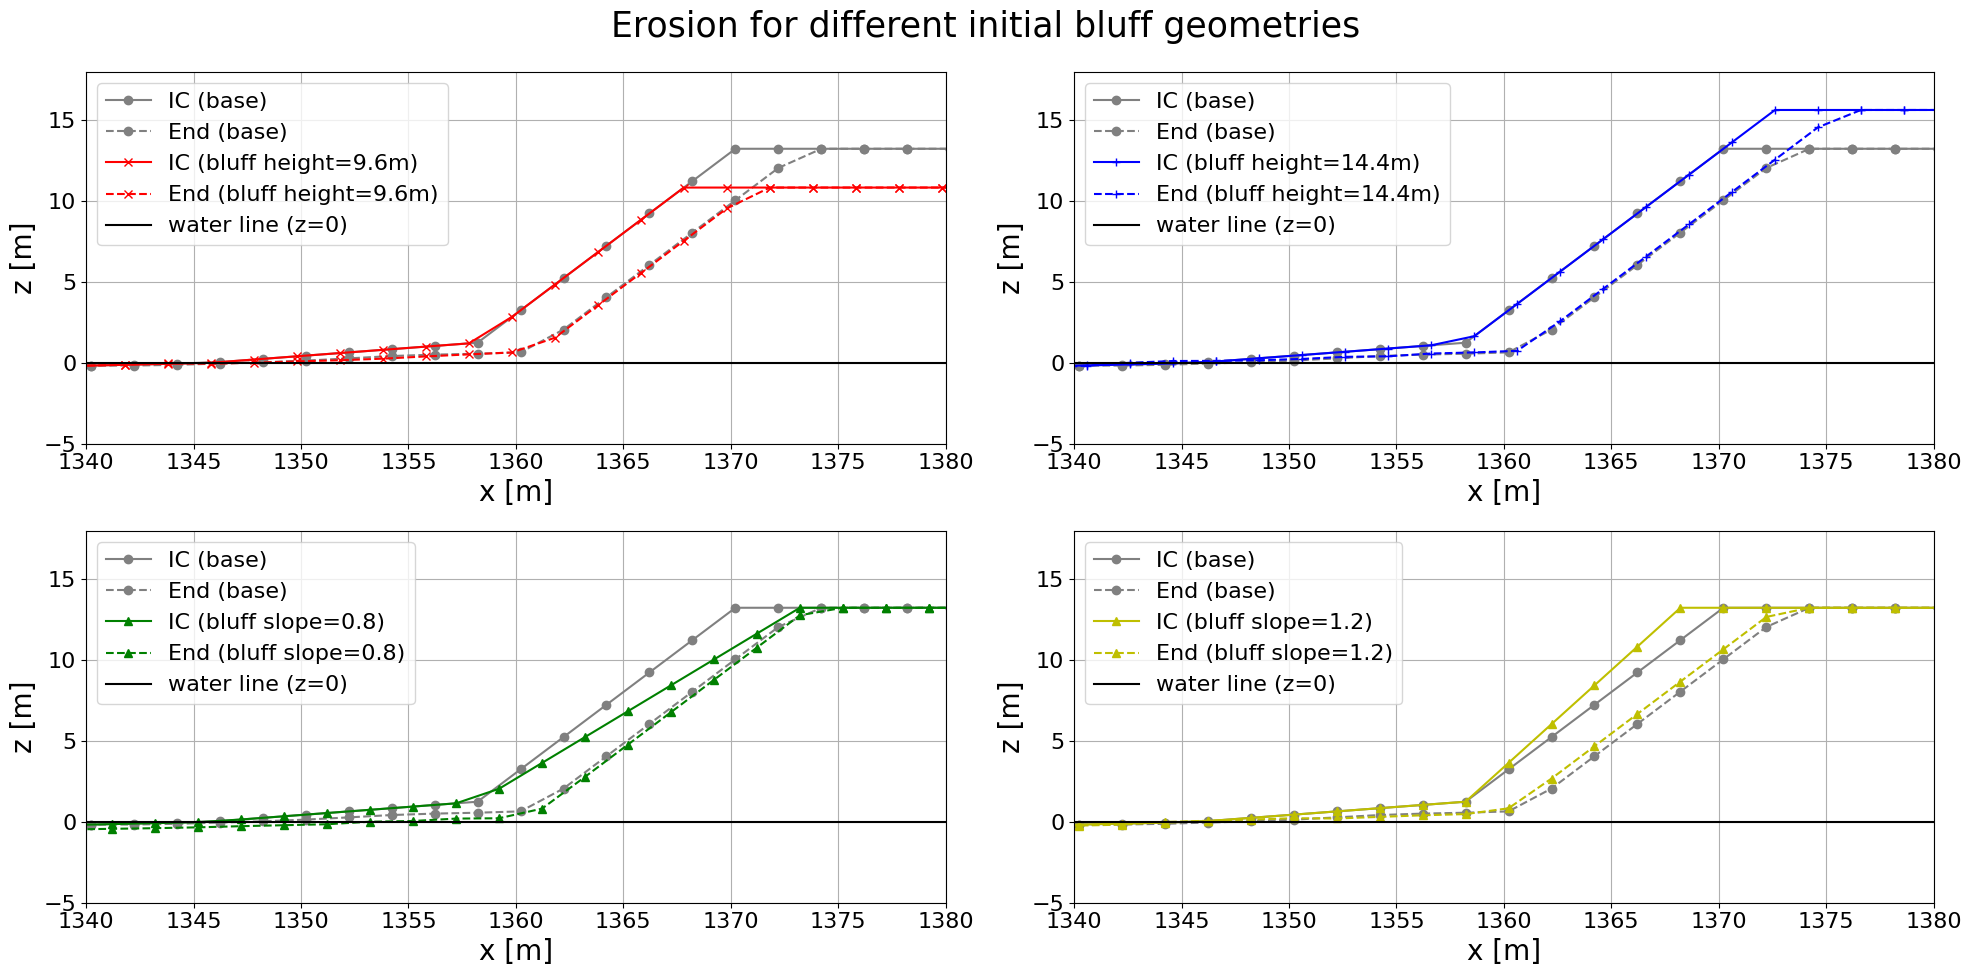

In [123]:
# ds_base_ic = xr.load_dataset("sa_base_0000000000.nc")
# ds_base_end = xr.load_dataset("sa_base_0000017508.nc")

# ds_bluff_slope_low_ic = xr.load_dataset("sa_lvl1_1_0000000000.nc")
# ds_bluff_slope_low_end =xr.load_dataset("sa_lvl1_1_0000017508.nc")

# ds_bluff_slope_high_ic = xr.load_dataset("sa_lvl1_2_0000000000.nc")
# ds_bluff_slope_high_end =xr.load_dataset("sa_lvl1_2_0000017508.nc")

# ds_bluff_height_low_ic =  xr.load_dataset("sa_lvl1_3_0000000000.nc")
# ds_bluff_height_low_end = xr.load_dataset("sa_lvl1_3_0000017508.nc")

# ds_bluff_height_high_ic =  xr.load_dataset("sa_lvl1_4_0000000000.nc")
# ds_bluff_height_high_end = xr.load_dataset("sa_lvl1_4_0000017508.nc")
    
    
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

l1, l2 = axs

ax0, ax1 = l1
ax2, ax3 = l2

ax0.plot(ds_base_ic['xgr'], ds_base_ic['zgr'], label='IC (base)', color='grey', marker='o')
ax0.plot(ds_base_end['xgr'], ds_base_end['zgr'], label='End (base)', color='grey', marker='o', ls='--')
ax1.plot(ds_base_ic['xgr'], ds_base_ic['zgr'], label='IC (base)', color='grey', marker='o')
ax1.plot(ds_base_end['xgr'], ds_base_end['zgr'], label='End (base)', color='grey', marker='o', ls='--')
ax2.plot(ds_base_ic['xgr'], ds_base_ic['zgr'], label='IC (base)', color='grey', marker='o')
ax2.plot(ds_base_end['xgr'], ds_base_end['zgr'], label='End (base)', color='grey', marker='o', ls='--')
ax3.plot(ds_base_ic['xgr'], ds_base_ic['zgr'], label='IC (base)', color='grey', marker='o')
ax3.plot(ds_base_end['xgr'], ds_base_end['zgr'], label='End (base)', color='grey', marker='o', ls='--')

ax0.plot(ds_bluff_slope_low_ic['xgr'], ds_bluff_slope_low_ic['zgr'], label='IC (bluff height=9.6m)', color='r', marker='x')
ax0.plot(ds_bluff_slope_low_end['xgr'], ds_bluff_slope_low_end['zgr'], label='End (bluff height=9.6m)', color='r', marker='x', ls='--')

ax1.plot(ds_bluff_slope_high_ic['xgr'], ds_bluff_slope_high_ic['zgr'], label='IC (bluff height=14.4m)', color='b', marker='+')
ax1.plot(ds_bluff_slope_high_end['xgr'], ds_bluff_slope_high_end['zgr'], label='End (bluff height=14.4m)', color='b', marker='+', ls='--')

ax2.plot(ds_bluff_height_low_ic['xgr'], ds_bluff_height_low_ic['zgr'], label='IC (bluff slope=0.8)', color='g', marker='^')
ax2.plot(ds_bluff_height_low_end['xgr'], ds_bluff_height_low_end['zgr'], label='End (bluff slope=0.8)', color='g', marker='^', ls='--')

ax3.plot(ds_bluff_height_high_ic['xgr'], ds_bluff_height_high_ic['zgr'], label='IC (bluff slope=1.2)', color='y', marker='^')
ax3.plot(ds_bluff_height_high_end['xgr'], ds_bluff_height_high_end['zgr'], label='End (bluff slope=1.2)', color='y', marker='^', ls='--')

for ax in [ax0, ax1, ax2, ax3]:

    ax.axhline(0, color='k', label='water line (z=0)')

    ax.set_xlim((1340, 1380))
    ax.set_ylim(-5, 18)

    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')

    ax.grid()
    
    ax.legend(loc='upper left')

fig.suptitle('Erosion for different initial bluff geometries')

fig.tight_layout()

figname = f'transect_different_bathymetric_settings.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

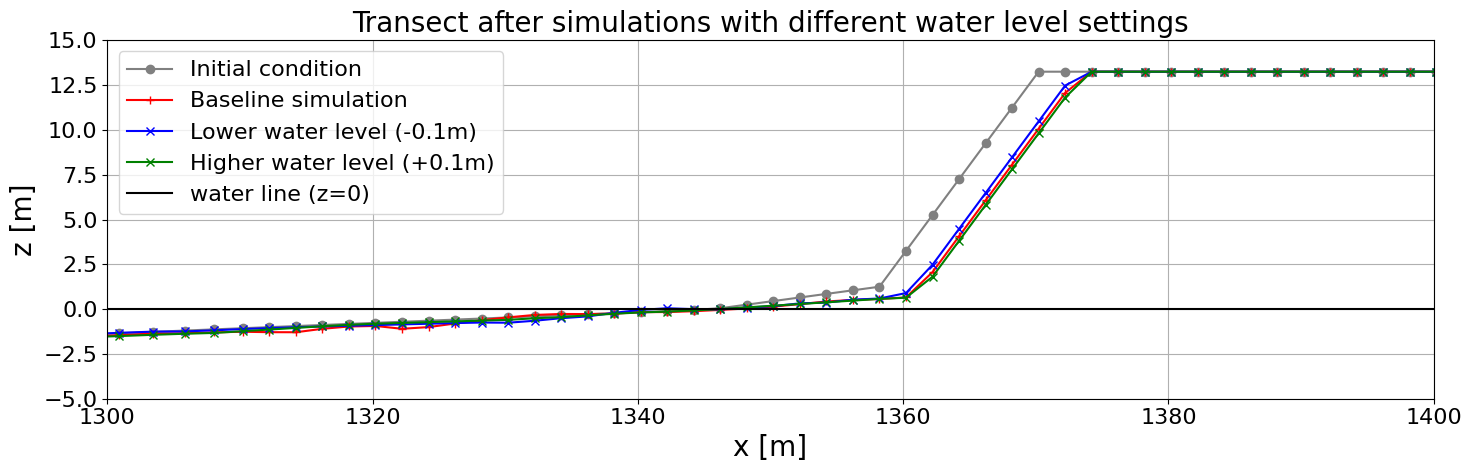

In [124]:
ds_IC = xr.load_dataset("sa_base_0000000000.nc")
ds_end = xr.load_dataset("sa_base_0000017508.nc")
ds_low = xr.load_dataset("sa_lvl2_1_0000017508.nc")
ds_high = xr.load_dataset("sa_lvl2_2_0000017508.nc")

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')

ax.plot(ds_end['xgr'], ds_end['zgr'], label='Baseline simulation', color='r', marker='+')
ax.plot(ds_low['xgr'], ds_low['zgr'], label='Lower water level (-0.1m)', color='b', marker='x')
ax.plot(ds_high['xgr'], ds_high['zgr'], label='Higher water level (+0.1m)', color='g', marker='x')

ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Transect after simulations with different water level settings')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'transect_water_level.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

8.25


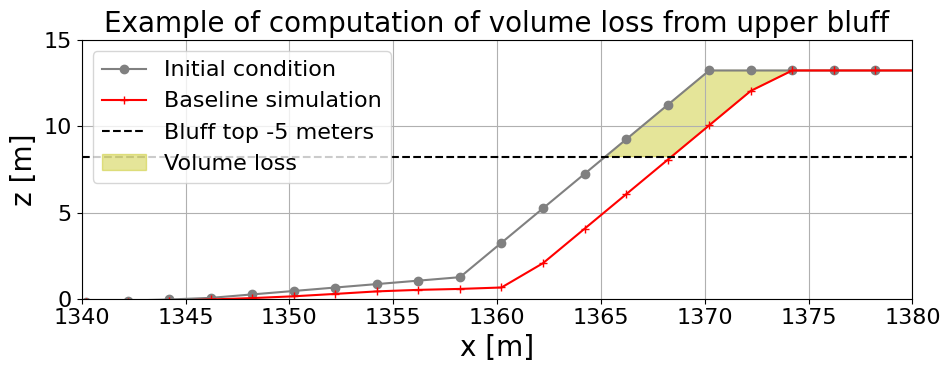

In [125]:
ds_IC = xr.load_dataset("sa_base_0000000000.nc")
ds_end = xr.load_dataset("sa_base_0000017508.nc")

N = 100000
max_distance_from_top = 5

xgr0_interp = np.linspace(min(ds_IC.xgr.values), max(ds_IC.xgr.values), N)
zgr0_interp = np.interp(xgr0_interp, ds_IC.xgr.values, ds_IC.zgr.values)

xgr1_interp = np.linspace(min(ds_end.xgr.values), max(ds_end.xgr.values), N)
zgr1_interp = np.interp(xgr1_interp, ds_end.xgr.values, ds_end.zgr.values)

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
ax.plot(ds_end['xgr'], ds_end['zgr'], label='Baseline simulation', color='r', marker='+')

# ax.scatter(xgr0_interp, zgr0_interp)
# ax.scatter(xgr1_interp, zgr1_interp)

z_hori = np.max(zgr0_interp - max_distance_from_top)

ax.axhline(z_hori, label='Bluff top -5 meters', ls='--', color='k')

x_mask = np.nonzero(zgr0_interp >= z_hori)

ax.fill_between(xgr0_interp[x_mask], zgr0_interp[x_mask], (np.maximum(np.ones(zgr1_interp.shape) * z_hori, zgr1_interp))[x_mask], color='y', alpha=0.4, label='Volume loss')

ax.set_xlim((1340, 1380))
ax.set_ylim((0, 15))

print(np.max(ds_IC['zgr'].values) - 5)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Example of computation of volume loss from upper bluff')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'transect_volume_loss_computation.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

In [126]:
# get data paths and create colormaps
folder_path = Path("val_per2_2_discrepency/")

fnames = np.array([f for f in os.listdir(folder_path)])

output_ids = np.int32(np.array([f[:-3] for f in fnames]))

sort_mask = np.argsort(output_ids)

fnames = fnames[sort_mask]
output_ids = output_ids[sort_mask]

# create colors for the bed level
cmap = 'plasma'

cmap_bed = colormaps[cmap]
colors=cmap_bed(np.linspace(0, 1, len(fnames)))
norm_bed = Normalize()
sm_bed = ScalarMappable(norm_bed, cmap=cmap_bed)

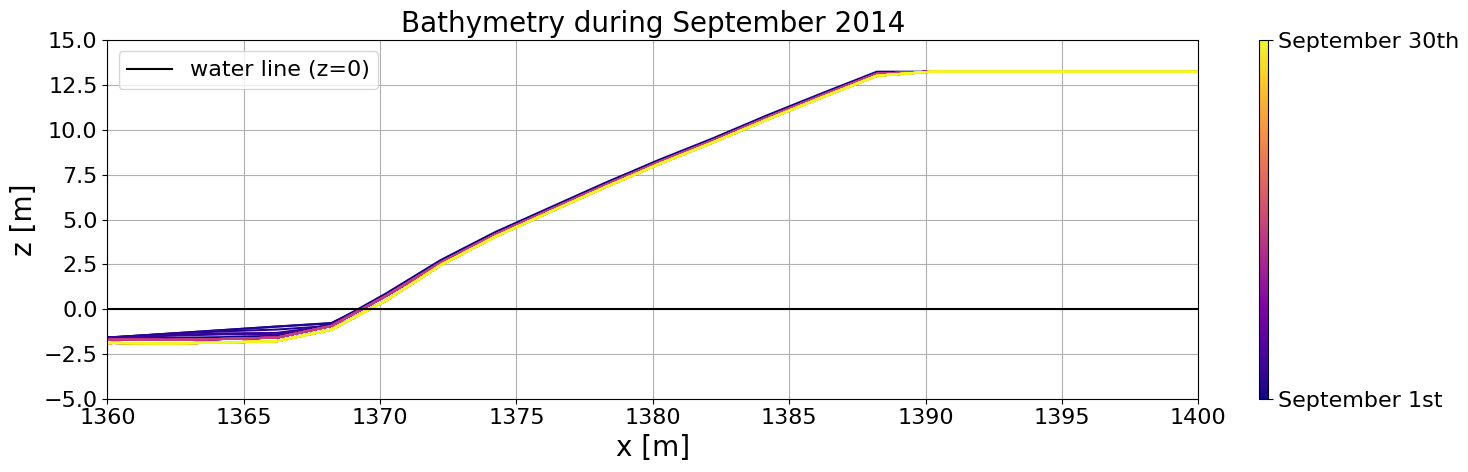

In [127]:
fig, ax = plt.subplots(figsize=(15,5))

for fname, output_id, color in zip(fnames, output_ids, colors):
    
    ds = xr.open_dataset(os.path.join(folder_path, fname))
    
    x = ds.xgr.values
    z = ds.zgr.values
    
    ds.close()

    ax.plot(x, z, color=color)

ax.axhline(0, label='water line (z=0)', color='k')

ax.set_xlim((1360, 1400))
ax.set_ylim(-5, 15)

# ax.set_xlim((1360, 1380))
# ax.set_ylim(5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Bathymetry during September 2014')

ax.legend(loc='upper left')

# create colorbar
cbar_bed = plt.colorbar(
    sm_bed, 
    ax=ax, 
    orientation='vertical', 
    fraction=0.05, 
    pad=0.05, 
    ticks=[0, 1], 
    aspect=40
)
cbar_bed.ax.set_yticklabels(['September 1st', 'September 30th'])

fig.tight_layout()

figname = 'transect_2014_discrepancy.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)